<a href="https://colab.research.google.com/github/Tilak46-R/Airline-Referral-capstone-project-Classification/blob/main/Airline_Referral_capstone_project_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING ALL THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  xgboost as xgb
from datetime import datetime as dt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm


from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

IMPORTING ALL THE NECESSARY METRICES

In [2]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [4]:
df = pd.read_excel("/content/data_airline_reviews.xlsx")

In [6]:
airline_data = df.copy()

In [7]:
airline_data.head(10)


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [8]:
airline_data.tail(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


# **EXPLORATORY DATA ANALYSIS (EDA)**

In [9]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [10]:
airline_data.duplicated().sum()

70711

In [11]:
airline_data.drop_duplicates(inplace = True)

In [12]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(

In [13]:
airline_data.dropna(how = "all", inplace = True)

In [14]:
airline_data


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [15]:
airline_data.isnull().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

In [16]:
airline_data.isnull().sum()/len(airline_data)

airline            0.000000
overall            0.029126
author             0.000000
review_date        0.000000
customer_review    0.000000
aircraft           0.697825
traveller_type     0.386431
cabin              0.040501
route              0.386872
date_flown         0.388163
seat_comfort       0.081264
cabin_service      0.080790
food_bev           0.209895
entertainment      0.342464
ground_service     0.392495
value_for_money    0.030335
recommended        0.023242
dtype: float64

# **UNIVARIATIVE ANALYSIS**

# **1. Types of classes in cabin**

In [24]:
cabin = airline_data['cabin'].unique()
print(cabin)

['Economy Class' 'Business Class' nan 'Premium Economy' 'First Class']


<Axes: ylabel='cabin'>

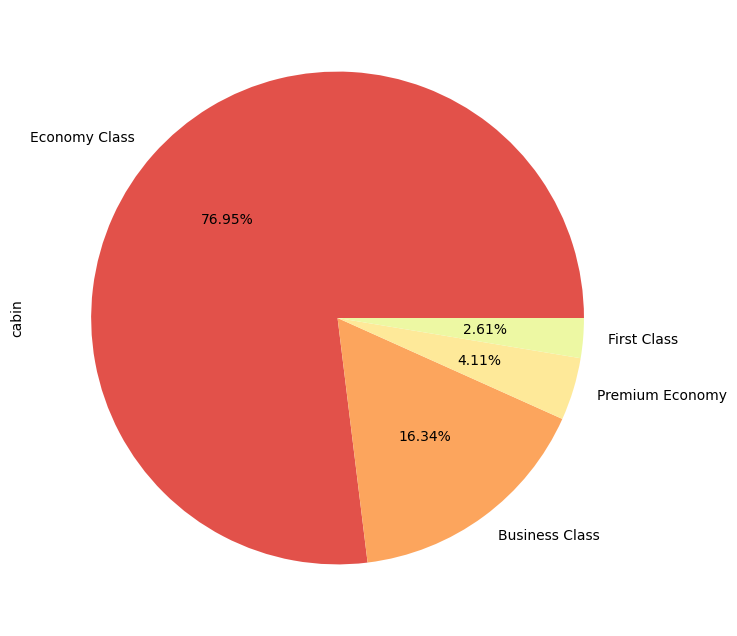

In [28]:
sns.set_palette('Spectral')
airline_data['cabin'].value_counts().plot(kind = 'pie', autopct = '%1.02f%%', figsize = (10,8))

# **2. Total travellers Count**

In [52]:
types = airline_data['traveller_type'].value_counts()

In [53]:
types

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

Count of cabin in

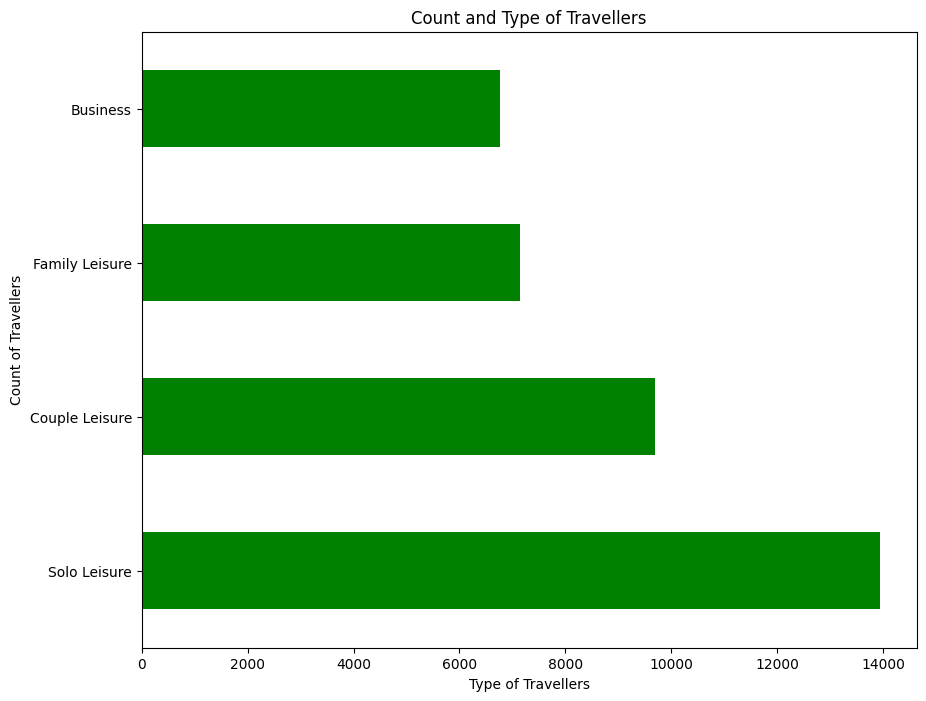

In [71]:
plt.figure(figsize = (10,8))
airline_data['traveller_type'].value_counts().plot(kind = 'barh', color = 'g')
plt.title("Count and Type of Travellers")
plt.xlabel("Type of Travellers")
plt.ylabel("Count of Travellers")
plt.show()

# **3.How often they recommend?**

In [59]:
recommendation = airline_data['recommended'].value_counts()
recommendation

no     31268
yes    28493
Name: recommended, dtype: int64

<Axes: >

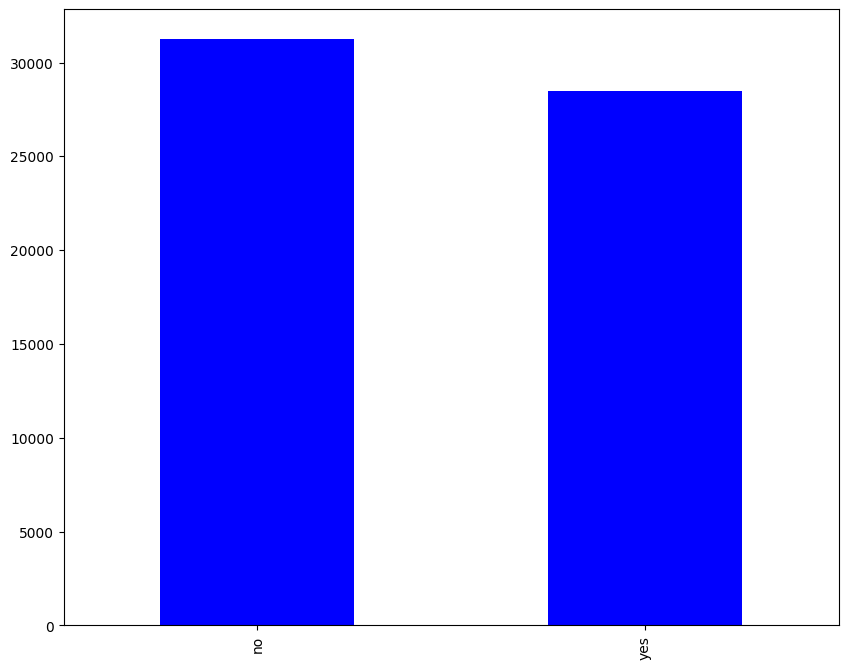

In [62]:
plt.figure(figsize = (10,8))
airline_data['recommended'].value_counts().plot(kind = 'bar', color = 'b')

# **4. Most Frequently used and Rarely used airlines.**

In [79]:
airline_type = airline_data['airline'].value_counts()[0:26]
airline_type

Spirit Airlines             2871
American Airlines           2846
United Airlines             2774
British Airways             2731
Emirates                    1763
China Southern Airlines     1719
Frontier Airlines           1622
Ryanair                     1550
Delta Air Lines             1535
Turkish Airlines            1478
Qatar Airways               1430
Lufthansa                   1401
Qantas Airways              1339
Etihad Airways              1283
Air Canada                  1272
Cathay Pacific Airways      1184
Norwegian                   1145
Singapore Airlines          1054
Air Canada rouge            1032
easyJet                     1030
KLM Royal Dutch Airlines     969
Vueling Airlines             962
Air France                   928
Southwest Airlines           909
TAP Portugal                 844
Thai Airways                 791
Name: airline, dtype: int64

In [77]:
airline_type

Spirit Airlines             2871
American Airlines           2846
United Airlines             2774
British Airways             2731
Emirates                    1763
China Southern Airlines     1719
Frontier Airlines           1622
Ryanair                     1550
Delta Air Lines             1535
Turkish Airlines            1478
Qatar Airways               1430
Lufthansa                   1401
Qantas Airways              1339
Etihad Airways              1283
Air Canada                  1272
Cathay Pacific Airways      1184
Norwegian                   1145
Singapore Airlines          1054
Air Canada rouge            1032
easyJet                     1030
KLM Royal Dutch Airlines     969
Vueling Airlines             962
Air France                   928
Southwest Airlines           909
TAP Portugal                 844
Thai Airways                 791
Name: airline, dtype: int64

<Axes: >

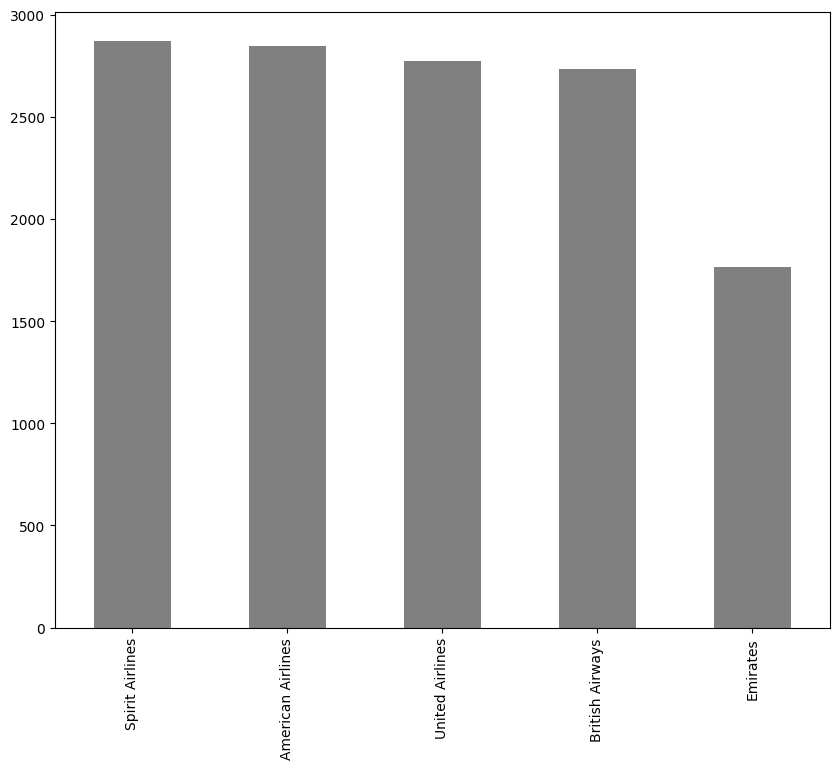

In [81]:
plt.figure(figsize = (10,8))
airline_data['airline'].value_counts()[0:5].plot(kind = 'bar',color = 'grey')

<Axes: >

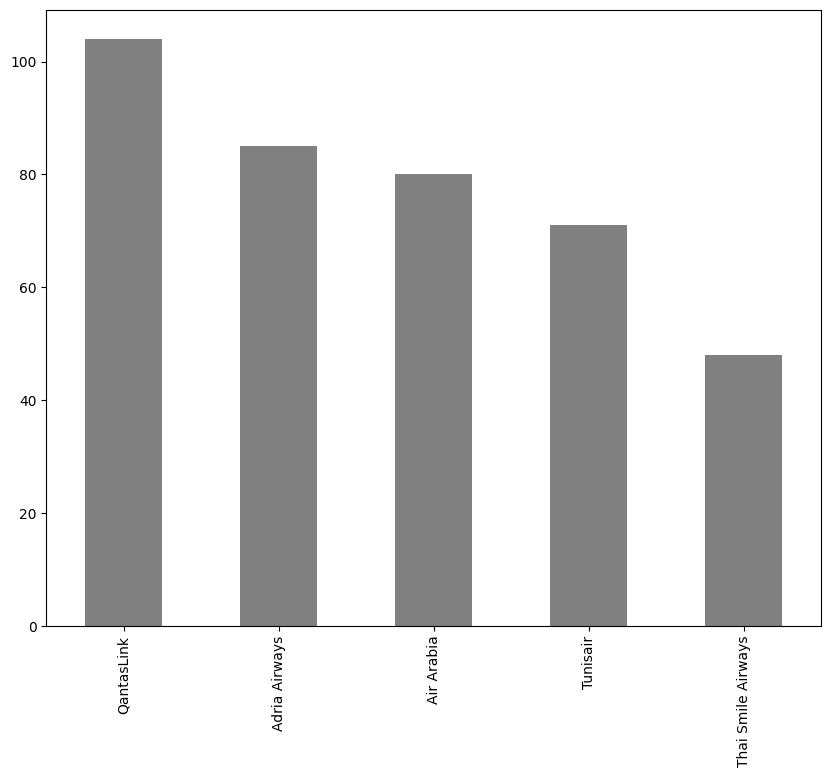

In [76]:
plt.figure(figsize = (10,8))
airline_data['airline'].value_counts().tail(5).plot(kind = 'bar',color = 'grey')

# **5. Most Frequently used and Rarely used Aircrafts**

In [74]:
aircrafts = airline_data['aircraft'].value_counts()
aircrafts

A320                         2130
A380                         1109
Boeing 777                   1101
Boeing 737-800               1021
A330                          974
                             ... 
Boeing 777-200 / 757-300        1
CRJ-700 (and others)            1
Crj200                          1
Embraer, Boeing 777 / 787       1
boeing 767                      1
Name: aircraft, Length: 2088, dtype: int64

In [ ]:
plt.figure(figsize = )